# Predicting Heart Disease Using ML

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
**Given clinical parameters about a patient, can we predict whether or not they have heart disease?**

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repositary.
https://archive.ics.uci.edu/ml/datasets/heart+disease

Kaggle version https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
> if we can reach 95% accuracy at predicting heart_disease, we'll pursue further

## 4. Features

This is where you have all information about features in your data

**Create data dictionary**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Preparing the tools

In [2]:
#import all the tools we need

#regualr EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape #rows and columns

(303, 14)

## Data Exploration (EDA)

Goal is to find out more about data and become a subject matter expert here.

EXPLORE EXPLORE EXPLORE

1. What kind of data you have?
2. What is the problem you are trying to solve?
3. Finding missing data and deal with it.
4. Find outliers and find reasons behind them and deal with them.
5. Add or change remove features too get more out from our data.

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#find target classes
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

**It is a relatively balanced dataset**

<AxesSubplot:>

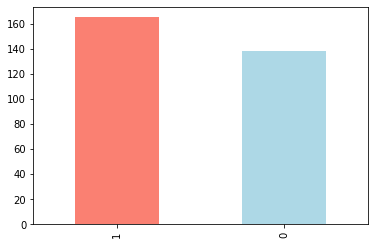

In [7]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Heart Disease frequency according to sex**

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

We have more males than female

In [12]:
#compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


**Only based on our data**

We can see that when sex is 1 or male, there is 50% chance of heart disease. That is balanced. But when sex is 0 or female. approx 70% have heart disease.

So, we see any random patient, who is female, and only based on gender, we can say that 70% chance that this person have heart disease.

So, we need to work with other parameters to make ML model

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

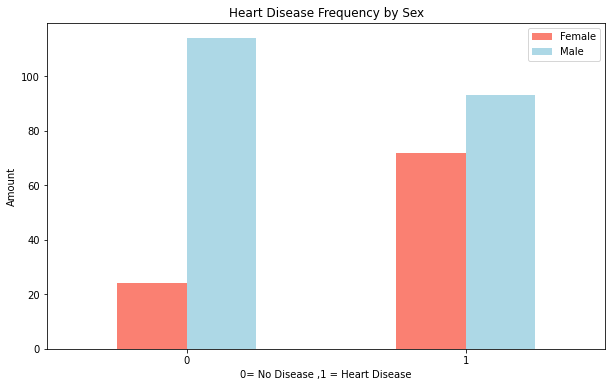

In [16]:
#create plot
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   color=["salmon","lightblue"],
                                   figsize=(10,6))

plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0= No Disease ,1 = Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

thalach is max heart rate . It is a continous and have lots of different unique values. we need to use something else to visualise it

**Age vs Heart rate**

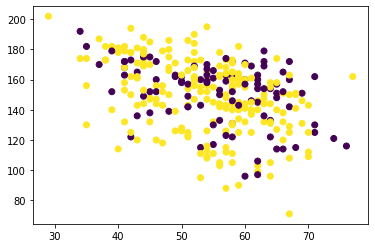

In [28]:
plt.scatter(df.age, df.thalach, c=df.sex, cmap="viridis")
plt.show()

Text(0, 0.5, 'Max Heart Rate')

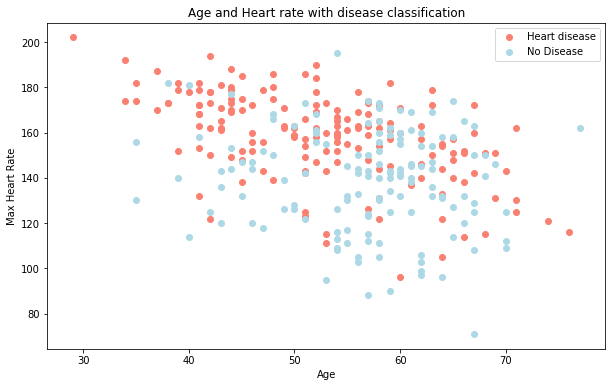

In [32]:
#create another figure
plt.figure(figsize=(10,6))

#scatter with positive example
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c="salmon")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.legend(["Heart disease","No Disease"])
plt.title("Age and Heart rate with disease classification")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")

<AxesSubplot:ylabel='Frequency'>

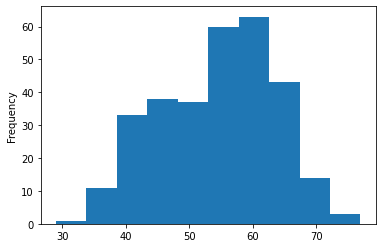

In [33]:
#check distribution of the age
df.age.plot(kind="hist")

**lets see chestpain vs heart disease**

In [35]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


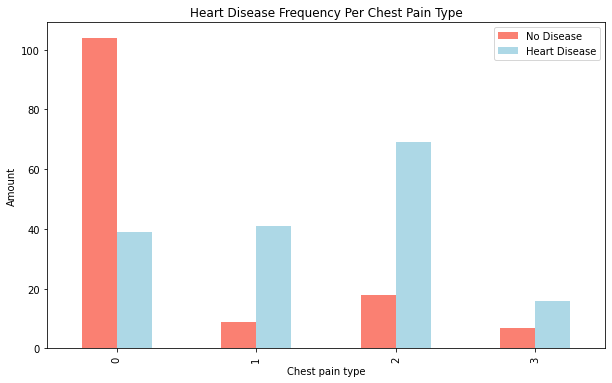

In [36]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize = (10,6),
                                  color = ["salmon","lightblue"])

#add info
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Heart Disease"])

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Building correlation matrix

In [38]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

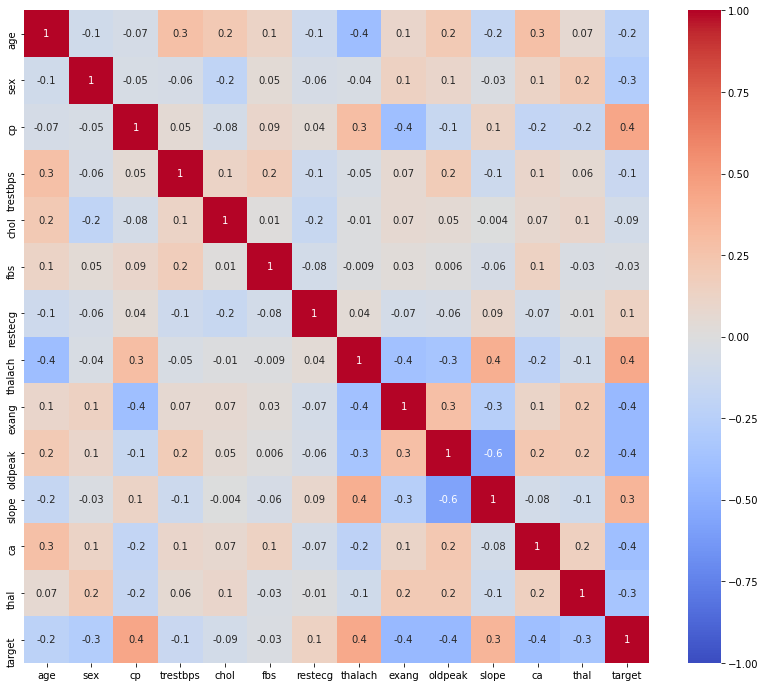

In [49]:
fig,ax = plt.subplots(figsize=(14,12))

sns.heatmap(df.corr(),
            annot = True,
            fmt='.1g',
            vmin=-1,
            vmax=1,
            center=0,
            cmap='coolwarm',
            ax= ax)

<ipython-input-51-4f4a876d4936>:38: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = fig.colorbar(m)


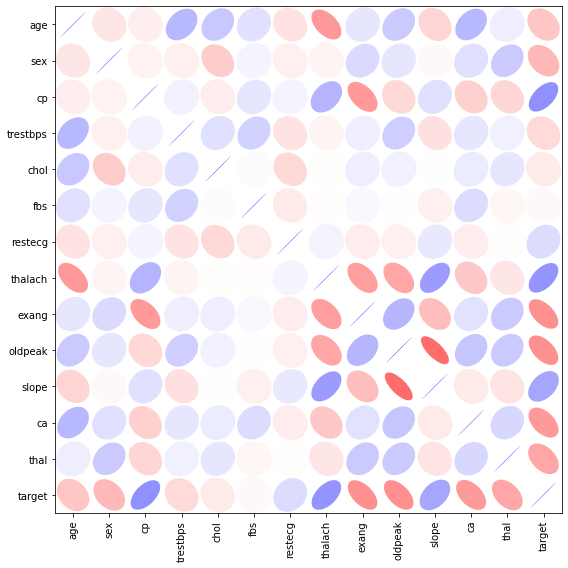

In [51]:
#source- Book Practical Statistics for Data Scientist

from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(df.corr(), figsize=(10, 8), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

# Modeling

our goal is to make a model with minimum 95% accuracy

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
#split into features and target
X = df.drop('target', axis=1)
y = df['target']

In [55]:
#split into train and test split
np.random.seed(20)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) 

**use scikitlearn's ml map to choose ML model**

We're going to check three different ML models:
1. Logistic Regression
2. K-Nearesr Neighbours Classifier
3. Random Forest Classifier


In [73]:
#putting models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given ML model
    """
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    
    return model_scores

In [74]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

/Users/yogeshtak/Documents/Python3/datascience_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
model_scores

{'Logistic Regression': 0.7377049180327869,
 'KNN': 0.7213114754098361,
 'Random Forest': 0.7868852459016393}

In [76]:
#convert to dataframe
model_score_df = pd.DataFrame(model_scores, index=["accuracy"])

In [77]:
model_score_df

,Logistic Regression,KNN,Random Forest
accuracy,0.737705,0.721311,0.786885


<AxesSubplot:>

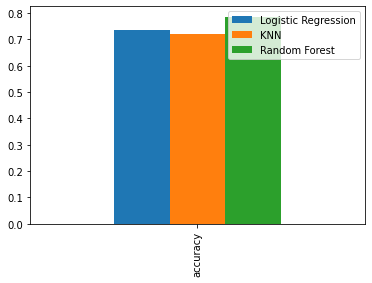

In [78]:
model_score_df.plot.bar()

Got the baseline model. Improving it now

1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 Score
8. Classification Report
9. ROC curve
10. Area under the curve (AUC)

### Hyperparameter Tuning

In [79]:
#Tune KNN

train_scores = []
test_scores = []

#create a list of different values for n_neighbors
neighbors = range(1,21)

#setup KNN
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    #update train score
    train_scores.append(knn.score(X_train,y_train))
    
    #update the test score
    test_scores.append(knn.score(X_test, y_test))

In [80]:
train_scores

[1.0,
 0.7768595041322314,
 0.7396694214876033,
 0.7644628099173554,
 0.7768595041322314,
 0.756198347107438,
 0.731404958677686,
 0.7107438016528925,
 0.7231404958677686,
 0.6735537190082644,
 0.7107438016528925,
 0.7024793388429752,
 0.6983471074380165,
 0.7066115702479339,
 0.7066115702479339,
 0.6900826446280992,
 0.7107438016528925,
 0.7148760330578512,
 0.7066115702479339,
 0.7024793388429752]

In [81]:
test_scores

[0.6557377049180327,
 0.5573770491803278,
 0.6885245901639344,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836]

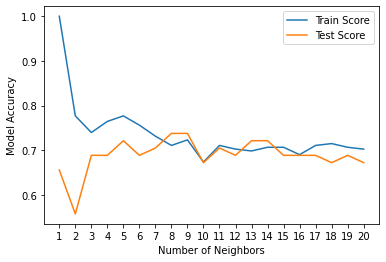

In [83]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Accuracy")
plt.legend()

In [84]:
print(f"Maximum accuracy was: {max(test_scores)*100:.2f}%")

Maximum accuracy was: 73.77%


**This is not a good accuracy score,we can move on to other model**

Let's try Logistic Regression and RandomForestClassifier with **RanomizedSearchCV**

In [89]:
#create a hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

#create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,100,50),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [86]:
#tune logistic regression
np.random.seed(42)

#setting up hyperparameter search on LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv =5,
                                n_iter=20,
                                verbose = True)


#fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [87]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [88]:
rs_log_reg.score(X_test,y_test)

0.7540983606557377

It's 2% better but still..

Now doing the same thing for RandomForestClassifier

In [91]:
#setup random seed
np.random.seed(42)

#setup random hyperparamter for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv=5,
                           n_iter = 20,
                           verbose = True)

#fitting it on test data
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [92]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 17,
 'max_depth': None}

In [93]:
rs_rf.score(X_test,y_test)

0.7704918032786885

It gone down 1% :(

**Tuning hyperparameters with GridSearchCV**